# Project: WeRateDogs Twitter Archive

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangle">Data Wrangling</a></li>
    <li><a href="#analyze">Data Analysis</a></li>
    <li><a href="#visualize">Data Visualization</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

## Introduction
<a id='intro'></a>

> text

> text

In [374]:
# import libraries
import glob
import json
import os
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling
<a id='wrangle'></a>

### Gathering

In [2]:
# read in twitter-archive-enhanced file
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# get response object of info from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# create tsv file for image predictions if it doesn't already exist
if not os.path.exists('image-predictions.tsv'):
    with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [5]:
# read image predictions into pandas DataFrame
df2 = pd.read_csv('image-predictions.tsv', delimiter='\t', encoding='utf-8')

In [6]:
# use key, token, and secrets to access Twitter API
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

# use tweepy to access api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

> Althought the following section could have been done simpler by pulling the three columns of information from the API directly into the df3_list and then converting it into a DataFrame, it was stated in the project details that the tweets need to be stored in .txt files and then read into the DataFrame.

In [7]:
# make folder to store tweet info if it doesn't already exist
folder_name = 'tweet_infos'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [8]:
# create error list to catch tweet_ids where the tweet_info doesn't get pulled
error_list = []
# go through tweet_ids in df1 and saving tweet_info as txt files in tweet_infos folder
for tweet_id in df1.tweet_id:
    try:
        tweet_info = json.dumps(api.get_status(str(tweet_id), tweet_mode='extended')._json)
        with open(os.path.join(folder_name, '{}{}'.format(tweet_id,'.txt')), mode='w') as file:
            file.write(tweet_info)
            print(tweet_id)
    except Exception as e:
        print('error')
        error_list.append(tweet_id)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
error
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035918850
881906

819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311648768
814578408554463233
814530161257443328
814153002265309185
813944609378369540
813910438903693312
813812741911748608
813800681631023104
813217897535406080
813202720496779264
813187593374461952
813172488309

760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336


Rate limit reached. Sleeping for: 627


758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
error
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
751830

705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434

678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136


Rate limit reached. Sleeping for: 634


676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206

668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997

In [9]:
# create list to append information into
df3_list = []
# fill list with info from text files
for tweet_info in glob.glob('tweet_infos/*.txt'):
    with open(tweet_info, encoding='utf-8') as file:
        content = json.load(file)
        tweet_id = content['id']
        retweet_count = content['retweet_count']            
        favorite_count = content['favorite_count']
        df3_list.append({'tweet_id' : tweet_id,
                   'retweet_count' : retweet_count,
                   'favorite_count' : favorite_count})
        print(tweet_id)

666020888022790149
666029285002620928
666033412701032449
666044226329800704
666049248165822465
666050758794694657
666051853826850816
666055525042405380
666057090499244032
666058600524156928
666063827256086533
666071193221509120
666073100786774016
666082916733198337
666094000022159362
666099513787052032
666102155909144576
666104133288665088
666268910803644416
666273097616637952
666287406224695296
666293911632134144
666337882303524864
666345417576210432
666353288456101888
666362758909284353
666373753744588802
666396247373291520
666407126856765440
666411507551481857
666418789513326592
666421158376562688
666428276349472768
666430724426358785
666435652385423360
666437273139982337
666447344410484738
666454714377183233
666644823164719104
666649482315059201
666691418707132416
666701168228331520
666739327293083650
666776908487630848
666781792255496192
666786068205871104
666804364988780544
666817836334096384
666826780179869698
666835007768551424
666837028449972224
666983947667116034
666996132027

674255168825880576
674262580978937856
674265582246694913
674269164442398721
674271431610523648
674291837063053312
674307341513269249
674318007229923329
674330906434379776
674372068062928900
674394782723014656
674410619106390016
674416750885273600
674422304705744896
674436901579923456
674447403907457024
674468880899788800
674606911342424069
674632714662858753
674638615994089473
674644256330530816
674646392044941312
674664755118911488
674670581682434048
674690135443775488
674737130913071104
674739953134403584
674742531037511680
674743008475090944
674752233200820224
674754018082705410
674764817387900928
674767892831932416
674774481756377088
674781762103414784
674788554665512960
674790488185167872
674793399141146624
674800520222154752
674805413498527744
674999807681908736
675003128568291329
675006312288268288
675015141583413248
675047298674663426
675109292475830276
675111688094527488
675113801096802304
675135153782571009
675145476954566656
675146535592706048
675147105808306176
675149409102

693486665285931008
693582294167244802
693590843962331137
693622659251335168
693629975228977152
693642232151285760
693644216740769793
693647888581312512
693942351086120961
693993230313091072
694001791655137281
694183373896572928
694206574471057408
694329668942569472
694342028726001664
694352839993344000
694356675654983680
694669722378485760
694905863685980160
694925794720792577
695051054296211456
695064344191721472
695074328191332352
695095422348574720
695314793360662529
695409464418041856
695446424020918272
695629776980148225
695767669421768709
695794761660297217
695816827381944320
696100768806522880
696405997980676096
696488710901260288
696490539101908992
696518437233913856
696713835009417216
696744641916489729
696754882863349760
696877980375769088
696886256886657024
696894894812565505
696900204696625153
697242256848379904
697255105972801536
697259378236399616
697270446429966336
697463031882764288
697482927769255936
697516214579523584
697575480820686848
697596423848730625
697616773278

744334592493166593
744709971296780288
744971049620602880
744995568523612160
745057283344719872
745074613265149952
745314880350101504
745422732645535745
745433870967832576
745712589599014916
745789745784041472
746056683365994496
746131877086527488
746369468511756288
746507379341139972
746521445350707200
746542875601690625
746726898085036033
746757706116112384
746790600704425984
746818907684614144
746872823977771008
746906459439529985
747103485104099331
747204161125646336
747219827526344708
747242308580548608
747439450712596480
747461612269887489
747512671126323200
747594051852075008
747600769478692864
747648653817413632
747651430853525504
747816857231626240
747844099428986880
747885874273214464
747933425676525569
747963614829678593
748220828303695873
748307329658011649
748324050481647620
748337862848962560
748346686624440324
748568946752774144
748575535303884801
748692773788876800
748699167502000129
748705597323898880
748932637671223296
748977405889503236
749036806121881602
749064354620

799422933579902976
799757965289017345
799774291445383169
800018252395122689
800141422401830912
800188575492947969
800388270626521089
800443802682937345
800459316964663297
800513324630806528
800751577355128832
800855607700029440
800859414831898624
801115127852503040
801127390143516673
801167903437357056
801285448605831168
801538201127157760
801854953262350336
801958328846974976
802185808107208704
802239329049477120
802265048156610565
802323869084381190
802572683846291456
802600418706604034
802624713319034886
802952499103731712
803276597545603072
803321560782307329
803380650405482500
803638050916102144
803692223237865472
803773340896923648
804026241225523202
804413760345620481
804475857670639616
804738756058218496
805207613751304193
805487436403003392
805520635690676224
805823200554876929
805826884734976000
805932879469572096
805958939288408065
806219024703037440
806242860592926720
806542213899489280
806576416489959424
806620845233815552
806629075125202948
807010152071229440
807059379405

864873206498414592
865006731092295680
865359393868664832
865718153858494464
866094527597207552
866334964761202691
866450705531457537
866686824827068416
866720684873056260
867051520902168576
867072653475098625
867421006826221569
867774946302451713
867900495410671616
868552278524837888
868622495443632128
868639477480148993
868880397819494401
869227993411051520
869596645499047938
869702957897576449
869772420881756160
870063196459192321
870308999962521604
870374049280663552
870656317836468226
870726314365509632
870804317367881728
871032628920680449
871102520638267392
871166179821445120
871515927908634625
871762521631449091
871879754684805121
872122724285648897
872486979161796608
872620804844003328
872820683541237760
872967104147763200
873213775632977920
873337748698140672
873580283840344065
874012996292530176
874057562936811520
874296783580663808
874434818259525634
874680097055178752
875021211251597312
875097192612077568
875144289856114688
875747767867523072
876120275196170240
876484053909

In [10]:
# convert list to DataFrame
df3 = pd.DataFrame(df3_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

### Assessing

In [11]:
# overview df1
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# numerical information for columns in df1
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# column info for df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

`df1` columns:
* **tweet_id**: the 18 digit unique id for each tweet in the provided WeRateDogs twitter archive
* **in_reply_to_status_id**: if a reply tweet, the 21 digit status id of the original tweet
* **in_reply_to_user_id**: if a reply tweet, the user id of the original tweet
* **timestamp**: the time the tweet was recorded
* **source**: the reference website the tweet was sent from (Twitter for iPhone, Twitter Web Client, Vine, or TweetDeck)
* **text**: the full text of the tweet including shortened link
* **retweeted_status_id**: if a retweet, the 21 digit status id of the original tweet
* **retweeted_status_user_id**: if a retweet, the user id of the original tweet
* **retweeted_status_timestamp**: if a retweet, the timestamp of the original tweet
* **expanded_urls**: the full url of the tweet
* **rating_numerator**: the numerator for the rating extracted from the text of the tweet
* **rating_denominator**: the denominator of the rating extracted from the text of the tweet
* **name**: the name of the dog extracted from the text of the tweet
* **doggo**: either 'none' or 'doggo' if 'doggo' is used in the text of the tweet
* **floofer**:either 'none' or 'floofer' if 'floofer' is used in the text of the tweet
* **pupper**:either 'none' or 'pupper' if 'pupper' is used in the text of the tweet
* **puppo**:either 'none' or 'puppo' if 'puppo' is used in the text of the tweet

In [14]:
# column info for df2
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
# numerical information for columns in df2
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
# column info for df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


`df2` columns:
* **tweet_id**: the 18 digit unique id for each tweet in the provided WeRateDogs twitter archive
* **jpg_url**: the url of the image for the tweet
* **img_num**: 1-4 value???
* **p1**: the top dog breed prediction from the neural network
* **p1_conf**: the confidence of the prediction
* **p1_dog**: whether the prediction is a breed of dog
* **p2**: the second dog breed prediction from the neural network
* **p2_conf**: the confidence of the prediction
* **p2_dog**: whether the prediction is a breed of dog
* **p3**: the third dog breed prediction from the neural network
* **p3_conf**: the confidence of the prediction
* **p3_dog**: whether the prediction is a breed of dog|

In [17]:
# overview df3
df3.head()

,tweet_id,retweet_count,favorite_count
0,666020888022790149,474,2467
1,666029285002620928,44,121
2,666033412701032449,43,118
3,666044226329800704,134,279
4,666049248165822465,41,99


In [18]:
# numerical information for columns in df3
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2769.857694,7697.575225
std,6.820607e+16,4688.166484,11947.846235
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,557.000000,1336.000000
50%,7.184547e+17,1299.000000,3352.000000
75%,7.986654e+17,3221.000000,9453.000000
max,8.924206e+17,79567.000000,159459.000000


In [19]:
# column info for df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


`df3` columns:
* **tweet_id**: the 18 digit unique id for each tweet in the provided WeRateDogs twitter archive
* **retweet_count**: the number of retweets the tweet received
* **favorite_count**: the number of favorites (likes) the tweet received

### Cleaning

#### Quality
* Some rows in df1 are missing both retweet_count and favorite_count values.
* In df1 the retweet_count and favorite_count need to be ints.
* The tweet_id values should be stored as strings not floats.
* In df1 the timestamp column should be in datetime format.
* The stage column contains the incorrect values of 'doggopupper', 'doggofloofer', and 'doggopuppo'.
* In df1 the name column has none values listed as the string 'None'.
* In df1 some of the values in the name column are inputted incorrectly and are random lowercase words from the text.
* The df1 rating_numerator values 1776, 420, and 666 are joke value and are inconsistent with the rating scale of the rest of the values in the column for the data.

#### Tidiness
* In df1 the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls columns can be removed.
* In df1 the columns doggo, floofer, pupper, and puppo can be combined into one column, stage.
* df3 can be combined into df1 without sacrificing tidiness standards.

In [20]:
# TAKE OUT WHEN SUBMITTING!!!!!
# so here actually make three csv copies of the three dataframes so you can then just pull them back up if you need to redo something
#if not os.path.exists('df1_raw.csv'):
#    df1.to_csv('df1_raw.csv', index = False)
#    
#if not os.path.exists('df2_raw.csv'):
#    df2.to_csv('df2_raw.csv', index = False)
#    
#if not os.path.exists('df3_raw.csv'):
#    df3.to_csv('df3_raw.csv', index = False)

In [314]:
# ALSO TAKE OUT WHEN SUBMITTING!!!
#df1_clean = pd.read_csv('df1_raw.csv')
#df2_clean = pd.read_csv('df2_raw.csv')
#df3_clean = pd.read_csv('df3_raw.csv')

In [315]:
# copy dataframes for cleaning
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

#### Issue

In df1 the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls columns can be removed. 

#### Define

Use dataframe.drop to remove unnecessary columns.

#### Code

In [316]:
# use .drop for unnecessary columns
df1_clean = df1_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1);

#### Test

In [317]:
# confirm columns dropped
df1_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None


#### Issue

In df1 the columns doggo, floofer, pupper, and puppo can be combined into one column, stage.

#### Define

Replace 'None' text values in doggo, floofer, pupper, and puppo columns with '', then create 'stage' column to hold information, fill, and then drop old columns.

#### Code

In [318]:
# get counts of values in each column
print(df1_clean['doggo'].value_counts())
print(df1_clean['floofer'].value_counts())
print(df1_clean['pupper'].value_counts())
print(df1_clean['puppo'].value_counts())

None     2259
doggo    97  
Name: doggo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
None      2099
pupper    257 
Name: pupper, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64


In [319]:
# replace 'None' values in each column with empty strings
df1_clean['doggo'] = df1_clean['doggo'].replace('None','')
df1_clean['floofer'] = df1_clean['floofer'].replace('None','')
df1_clean['pupper'] = df1_clean['pupper'].replace('None','')
df1_clean['puppo'] = df1_clean['puppo'].replace('None','')

In [320]:
# combine columns into new 'stage' column
df1_clean['stage'] = df1_clean['doggo'].str.cat(df1_clean['floofer']).str.cat(df1_clean['pupper']).str.cat(df1_clean['puppo'])

In [321]:
# drop old columns
df1_clean = df1_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo']);

#### Test

In [322]:
# confirm dataframe change
df1_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,


In [323]:
# confirm counts are accurate
# though there were some errors in the concatenation of the stage column which will be addressed later
df1_clean.stage.value_counts()

                1976
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: stage, dtype: int64

#### Issue

df3 can be combined into df1 without sacrificing tidiness standards.

#### Define

Join df3 to df1 based on tweet_ids.

#### Code

In [324]:
# merge df3 to df1
df1_clean = pd.merge(df1_clean, df3_clean, on = 'tweet_id', how = 'left')

#### Test

In [326]:
# confirm addition of new columns to df1
df1_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,,7860.0,36902.0


In [327]:
# checking na values in new columns
print(df1_clean.retweet_count.isna().sum())
print(df1_clean.favorite_count.isna().sum())

23

#### Issue

Some rows in df1 are missing both retweet_count and favorite_count values.

#### Define

Drop the 23 rows from df1 which don't have retweet_count or favorite_count.

#### Code

In [329]:
# for loop through dataset dropping null retwet_count and favorite_count rows and printing row indexes
for index, row in df1_clean.iterrows():
    if df1_clean.retweet_count.isnull()[index] or df1_clean.favorite_count.isnull()[index]:
        print(index)
        df1_clean = df1_clean.drop([index])

19
95
101
104
118
132
155
182
211
247
253
260
296
298
363
382
506
566
750
784
818
932
1726


#### Test

In [330]:
# confirm no null values remaining
print(df1_clean.retweet_count.isnull().sum())
print(df1_clean.favorite_count.isnull().sum())

0

In [332]:
# confirm shape of dataframe after dropping rows
df1_clean.shape

(2333, 10)

#### Issue

In df1 the retweet_count and favorite_count need to be ints.

#### Define

use .astype(int) to convert the columns retweet_count and favorite_count to ints.

#### Code

In [333]:
# use .astype to convert column types and save to dataframe
df1_clean.retweet_count = df1_clean['retweet_count'].astype(int);
df1_clean.favorite_count = df1_clean['favorite_count'].astype(int);

#### Test

In [334]:
# confirm column change
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2333 non-null int64
timestamp             2333 non-null object
source                2333 non-null object
text                  2333 non-null object
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  2333 non-null object
stage                 2333 non-null object
retweet_count         2333 non-null int32
favorite_count        2333 non-null int32
dtypes: int32(2), int64(3), object(5)
memory usage: 262.3+ KB


#### Issue

The tweet_id values should be stored as strings not floats.

#### Define

Use .astype() to convert tweet_id for both dataframes to string values.

#### Code

In [338]:
#  use .astype to convert column types and save to dataframe
df1_clean.tweet_id = df1_clean['tweet_id'].astype(str);
df2_clean.tweet_id = df2_clean['tweet_id'].astype(str);

#### Test

In [339]:
# confirm column change
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null object
source                2333 non-null object
text                  2333 non-null object
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  2333 non-null object
stage                 2333 non-null object
retweet_count         2333 non-null int32
favorite_count        2333 non-null int32
dtypes: int32(2), int64(2), object(6)
memory usage: 262.3+ KB


In [340]:
# confirm column change
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Issue

In df1 the timestamp column should be in datetime format.

#### Define

Use pd.to_datetime() to convert timestamp column to datetime format.

#### Code

In [341]:
# use pd.to_datetime() to convert column to datetime format
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#### Test

In [342]:
# confirm column change
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null datetime64[ns, UTC]
source                2333 non-null object
text                  2333 non-null object
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  2333 non-null object
stage                 2333 non-null object
retweet_count         2333 non-null int32
favorite_count        2333 non-null int32
dtypes: datetime64[ns, UTC](1), int32(2), int64(2), object(5)
memory usage: 262.3+ KB


#### Issue

The stage column contains the incorrect values of 'doggopupper', 'doggofloofer', and 'doggopuppo'.

#### Define

For columns with stage value as 'doggopupper', 'doggofloofer', or 'doggopuppo', set stage value to ''.

#### Code

In [343]:
# get count of values in stage column
df1_clean.stage.value_counts()

                1957
pupper          244 
doggo           80  
puppo           29  
doggopupper     12  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: stage, dtype: int64

In [344]:
# list of incorrect values
names = ['doggopupper', 'doggofloofer', 'doggopuppo']
# for loop through dataframe setting stage values which match list to empty string
for index, row in df1_clean.iterrows():
    if row['stage'] in names:
        df1_clean.at[index, 'stage'] = ''

#### Test

In [345]:
# confirm no incorrect values
df1_clean.stage.value_counts()

           1971
pupper     244 
doggo      80  
puppo      29  
floofer    9   
Name: stage, dtype: int64

#### Issue

In df1 the names column has blank values listed as the string 'None'.

#### Define

Replace 'None' values in the name column with ''.

#### Code

In [346]:
# loop through dataframe to set 'None' values in name column to empty strings
for index, row in df1_clean.iterrows():
    if row['name'] == 'None':
        df1_clean.at[index, 'name'] = ''

#### Test

In [348]:
# confirm no 'None' value remaining
df1_clean[df1_clean['name'] == 'None']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


#### Issue

In df1 some of the values in the name column are inputted incorrectly and are random lowercase words from the text.

#### Define

For lowercase words in the name column set that cell value to ''.

#### Code

In [352]:
# loop through dataset to set lowercase names to empty strings
for index, row in df1_clean.iterrows():
    if row['name'].islower():
        df1_clean.at[index, 'name'] = ''

#### Test

In [353]:
# loop through dataset and print any lowercase names to confirm none remaining
for index, row in df1_clean.iterrows():
    if row['name'].islower():
        print(row['name'])

#### Issue

The df1 rating_numerator values 1776, 420, and 666 are joke value and are inconsistent with the rating scale of the rest of the values in the column for the data.

#### Define

Because int values for rating_numerator can't be set to mean value of column and pandas does not allow integer values to be set to nan, these rows will be dropped.

#### Code

In [357]:
# drop indexes for columns with joke values
df1_clean = df1_clean.drop([979, 188, 2074, 189])

#### Test

In [358]:
# confirm row dropped
df1_clean[df1_clean['rating_numerator'] == 666]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


In [359]:
# confirm row dropped
df1_clean[df1_clean['rating_numerator'] == 1776]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


In [360]:
# confirm row dropped
df1_clean[df1_clean['rating_numerator'] == 420]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


In [364]:
# confirm expected number of rows were dropped
df1_clean.shape

(2329, 10)

## Store

In [371]:
# save dataframes df1_clean and df2_clean as csv files
if not os.path.exists('twitter_archive_master.csv'):
    df1_clean.to_csv('twitter_archive_master.csv', index = False)
if not os.path.exists('image_predictions_master.csv'):
    df2_clean.to_csv('image_predictions_master.csv', index = False)

In [372]:
# read in dataframes for analysis
df1 = pd.read_csv('twitter_archive_master.csv')

In [373]:
# read ub datafranes fir analysis
df2 = pd.read_csv('image_predictions_master.csv')

<a id='analyze'></a>
## Data Analysis

In [379]:
# create base color to prevent unnecessary rainbow plots
base = sns.color_palette()[0]

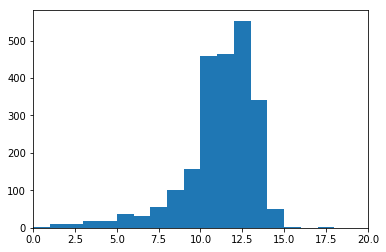

In [492]:
# histogram of rating_numerator values
# cap on max value to better see distribution of majority of points
inc = 1
bins = np.arange(0, 25 + inc, inc)
plt.hist(data = df1, x = 'rating_numerator', bins = bins);
plt.xlim(0, 20);

In [410]:
# for following plot getting log scaling information for bins 
np.log10(df1.retweet_count.describe())

count    3.367169
mean     3.442394
std      3.671190
min      0.000000
25%      2.745855
50%      3.113609
75%      3.507991
max      4.900733
Name: retweet_count, dtype: float64

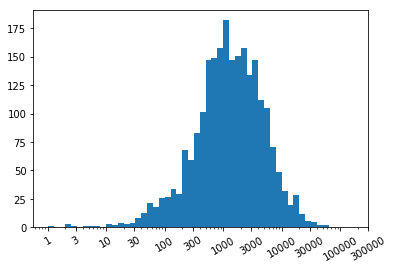

In [417]:
# histogram of retweet_count with log scaling
# shows unimodal, roughly normal distribution
inc = 0.1
bins = 10 ** np.arange(0, 4.9 + inc, inc)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df1, x = 'retweet_count', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels, rotation = 30);

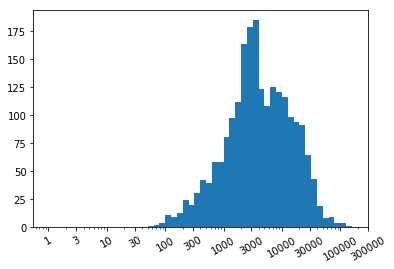

In [423]:
# histogram of favorite_count with log scaling
# shows large peak in distributino with more prominent skew left compared to retweet_count
inc = 0.1
bins = 10 ** np.arange(0, 5.2 + inc, inc)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df1, x = 'favorite_count', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels, rotation = 30);

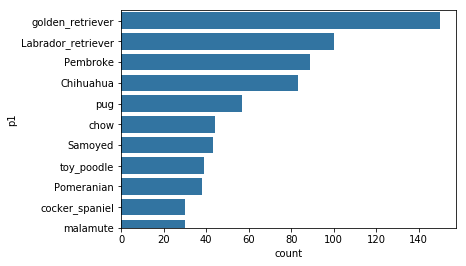

In [440]:
# bar chart of top ten counts of p1 predictions
p1_order = df2['p1'].value_counts().index
sns.countplot(data = df2, y = 'p1', color = base, order = p1_order);
plt.ylim(bottom = 10);

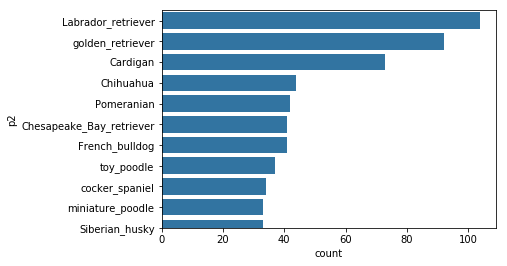

In [441]:
# bar chart of top ten counts of p2 predictions
p2_order = df2['p2'].value_counts().index
sns.countplot(data = df2, y = 'p2', color = base, order = p2_order);
plt.ylim(bottom = 10);

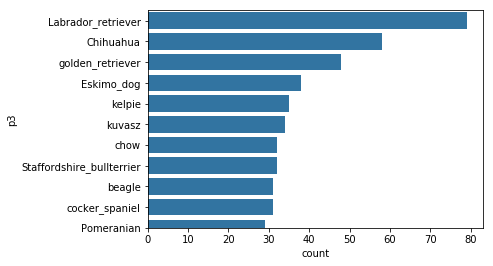

In [442]:
# bar chart of top ten counts of p3 predictions
p3_order = df2['p3'].value_counts().index
sns.countplot(data = df2, y = 'p3', color = base, order = p3_order);
plt.ylim(bottom = 10);

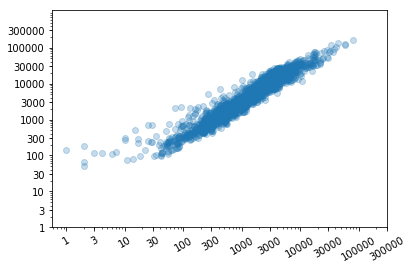

In [451]:
# scatterplot of retweet_count by favorite_count with log scaling for both
# shows very strong positive, linear relationship between the two
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
plt.scatter(data = df1, x = 'retweet_count', y = 'favorite_count', alpha = 0.25, )
plt.xscale('log');
plt.yscale('log');
plt.xticks(ticks, labels, rotation = 30);
plt.yticks(ticks, labels);

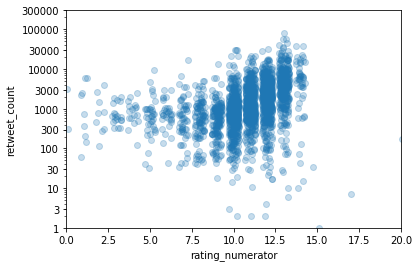

In [471]:
# scatter plot of rating_numerator by retweet_count with log scaling for y-axis
# shows potentially weak positive relationship 
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
sns.regplot(data = df1, x = 'rating_numerator', y = 'retweet_count', fit_reg = False, x_jitter = 0.3, scatter_kws = {'alpha' : 0.25});
plt.yscale('log');
plt.yticks(ticks, labels);
plt.xlim(0, 20);

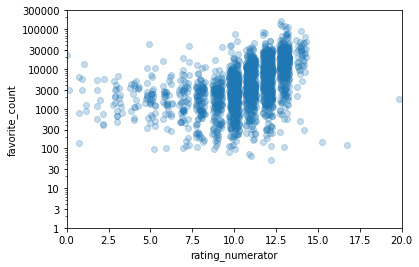

In [465]:
# scatter plot of rating_numerator by favorite_count with log scaling for y-axis
# shows potentially weak positive relationship 
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
sns.regplot(data = df1, x = 'rating_numerator', y = 'favorite_count', fit_reg = False, x_jitter = 0.3, scatter_kws = {'alpha' : 0.25});
plt.yscale('log');
plt.yticks(ticks, labels);
plt.xlim(0, 20);

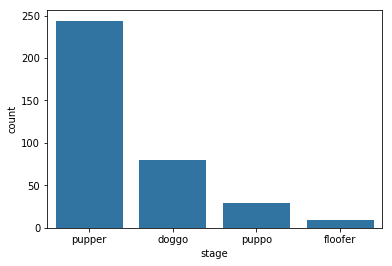

In [476]:
# bar chart of stage values ordered by count 
stage_order = df1['stage'].value_counts().index
sns.countplot(data = df1, x = 'stage', color = base, order = stage_order);

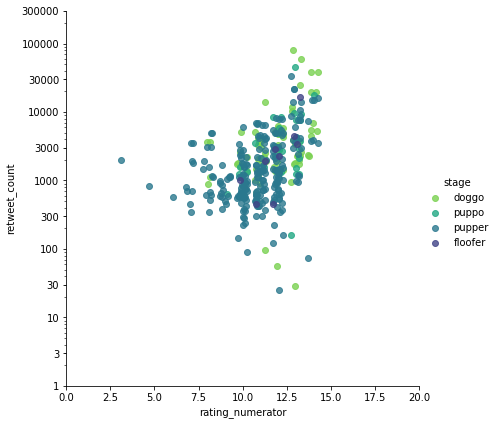

In [490]:
# scatter plot of rating_numerator by retweet_count for rows with stage values
# log scaling for y-axis
# shows possible trend of 'doggo' tweets having higher than average rating_numerators and retweet_counts
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
g = sns.FacetGrid(data = df1, hue = 'stage', palette = 'viridis_r', height = 6, aspect = 1)
g.map(sns.regplot, 'rating_numerator', 'retweet_count', x_jitter = 0.3, fit_reg = False);
plt.yscale('log');
plt.yticks(ticks, labels);
plt.xlim(0, 20);
g.add_legend();

<a id='conclusion'></a>
## Conclusion

### Data Wrangling Effort

### Data Analyses and Visualizations